# Ознайомлення з набором даних

## Початковий аналіз набору даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('My Illumination data.csv', parse_dates=['Timestamp'], dayfirst=True)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     54 non-null     datetime64[ns]
 1   Window                        54 non-null     int64         
 2   Lights                        54 non-null     int64         
 3   Illuminance on table (lx)     54 non-null     int64         
 4   Illuminance near window (lx)  54 non-null     int64         
 5   Weather                       54 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.7+ KB


,Timestamp,Window,Lights,Illuminance on table (lx),Illuminance near window (lx),Weather
0,2025-04-11 17:00:00,1,0,189,1037,Cloudy
1,2025-04-11 17:00:00,1,1,468,1194,Cloudy
2,2025-04-11 17:00:00,0,0,30,40,Cloudy
3,2025-04-11 20:00:00,1,0,38,38,Cloudy
4,2025-04-11 20:00:00,1,1,269,176,Cloudy
5,2025-04-11 20:00:00,0,0,30,30,Cloudy
6,2025-04-11 23:00:00,1,0,30,30,Cloudy
7,2025-04-11 23:00:00,1,1,253,253,Cloudy
8,2025-04-11 23:00:00,0,0,30,30,Cloudy
9,2025-04-12 11:00:00,1,0,149,927,Sunny


In [3]:
data.isnull().sum()

Timestamp                       0
Window                          0
Lights                          0
Illuminance on table (lx)       0
Illuminance near window (lx)    0
Weather                         0
dtype: int64

## Початкові графіки освітлення

<Figure size 1000x600 with 0 Axes>

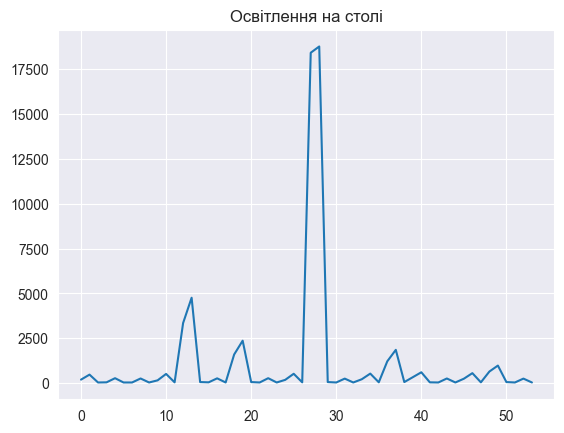

In [23]:
plt.figure(figsize=(10, 6))
data.plot(y=["Illuminance on table (lx)"], legend=False)
plt.title("Освітлення на столі")
plt.show()

<Figure size 1000x600 with 0 Axes>

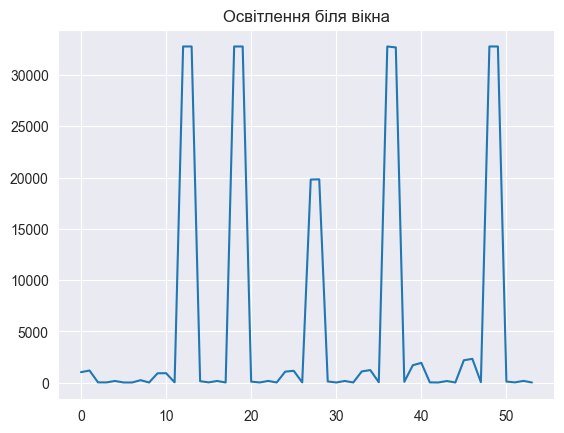

In [24]:
plt.figure(figsize=(10, 6))
data.plot(y=["Illuminance near window (lx)"], legend=False)
plt.title("Освітлення біля вікна")
plt.show()

# Розділення часової мітки

In [6]:
data["Hour"] = data["Timestamp"].dt.hour
data["Date"] = data["Timestamp"].dt.date
data["TimeOfDay"] = pd.cut(data["Hour"], bins=[-1, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

data.head(10)

,Timestamp,Window,Lights,Illuminance on table (lx),Illuminance near window (lx),Weather,Hour,Date,TimeOfDay
0,2025-04-11 17:00:00,1,0,189,1037,Cloudy,17,2025-04-11,Afternoon
1,2025-04-11 17:00:00,1,1,468,1194,Cloudy,17,2025-04-11,Afternoon
2,2025-04-11 17:00:00,0,0,30,40,Cloudy,17,2025-04-11,Afternoon
3,2025-04-11 20:00:00,1,0,38,38,Cloudy,20,2025-04-11,Evening
4,2025-04-11 20:00:00,1,1,269,176,Cloudy,20,2025-04-11,Evening
5,2025-04-11 20:00:00,0,0,30,30,Cloudy,20,2025-04-11,Evening
6,2025-04-11 23:00:00,1,0,30,30,Cloudy,23,2025-04-11,Evening
7,2025-04-11 23:00:00,1,1,253,253,Cloudy,23,2025-04-11,Evening
8,2025-04-11 23:00:00,0,0,30,30,Cloudy,23,2025-04-11,Evening
9,2025-04-12 11:00:00,1,0,149,927,Sunny,11,2025-04-12,Morning


# Побудова теплової карти

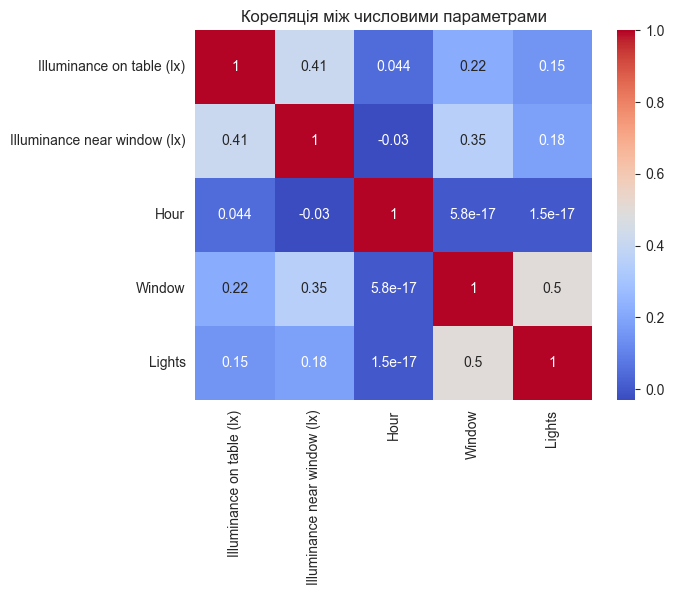

In [25]:
corr = data[["Illuminance on table (lx)", "Illuminance near window (lx)", "Hour", "Window", "Lights"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Кореляція між числовими параметрами")
plt.show()

# Аналіз освітлення на столі

## Boxplot по Weather

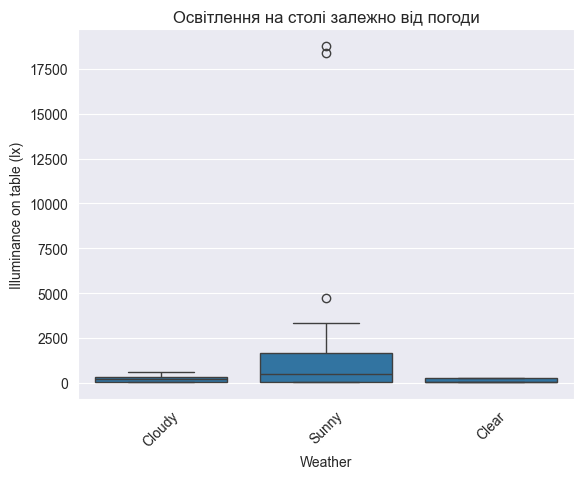

In [8]:
sns.boxplot(data=data, x="Weather", y="Illuminance on table (lx)")
plt.title("Освітлення на столі залежно від погоди")
plt.xticks(rotation=45)
plt.show()

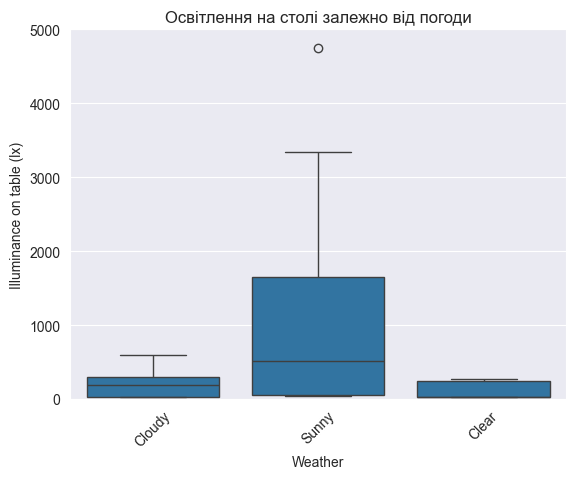

In [9]:
sns.boxplot(data=data, x="Weather", y="Illuminance on table (lx)")
plt.title("Освітлення на столі залежно від погоди")
plt.xticks(rotation=45)
plt.ylim(0, 5000)
plt.show()

## Boxplot для Window і Lights

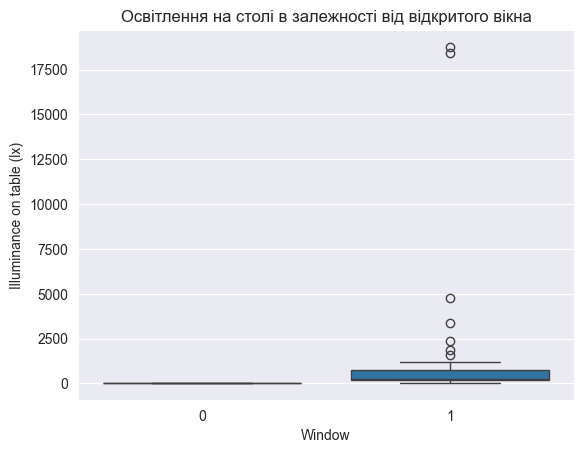

In [10]:
sns.boxplot(data=data, x="Window", y="Illuminance on table (lx)")
plt.title("Освітлення на столі в залежності від відкритого вікна")
plt.show()

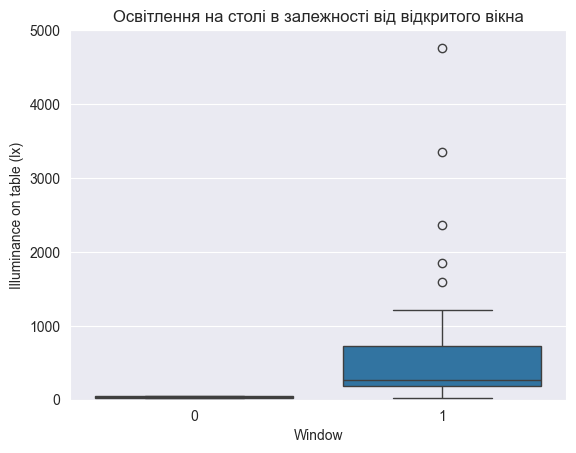

In [11]:
sns.boxplot(data=data, x="Window", y="Illuminance on table (lx)")
plt.title("Освітлення на столі в залежності від відкритого вікна")
plt.ylim(0, 5000)
plt.show()

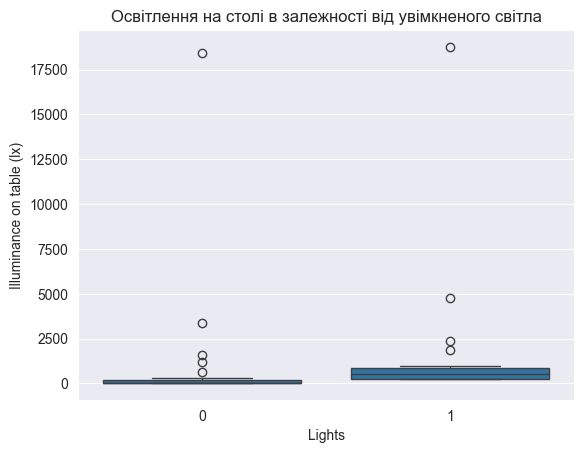

In [12]:
sns.boxplot(data=data, x="Lights", y="Illuminance on table (lx)")
plt.title("Освітлення на столі в залежності від увімкненого світла")
plt.show()

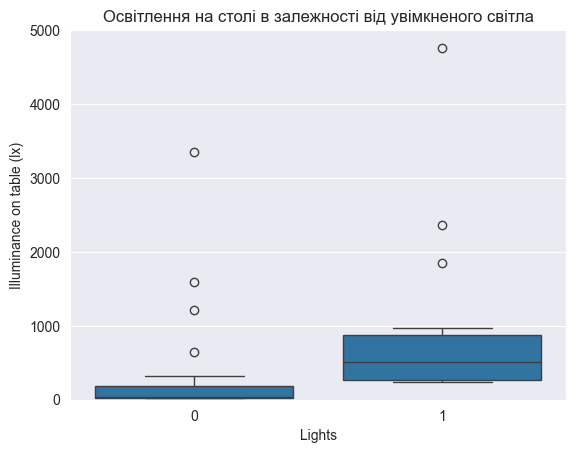

In [13]:
sns.boxplot(data=data, x="Lights", y="Illuminance on table (lx)")
plt.title("Освітлення на столі в залежності від увімкненого світла")
plt.ylim(0, 5000)
plt.show()

## Часові ряди

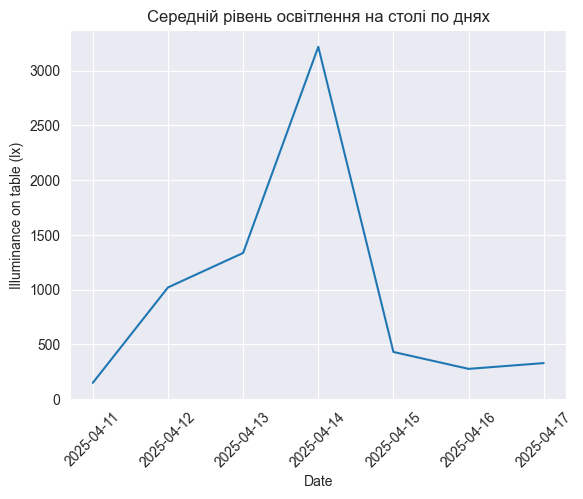

In [14]:
sns.lineplot(data=data, x="Date", y="Illuminance on table (lx)", errorbar=None)
plt.title("Середній рівень освітлення на столі по днях")
plt.xticks(rotation=45)
plt.show()

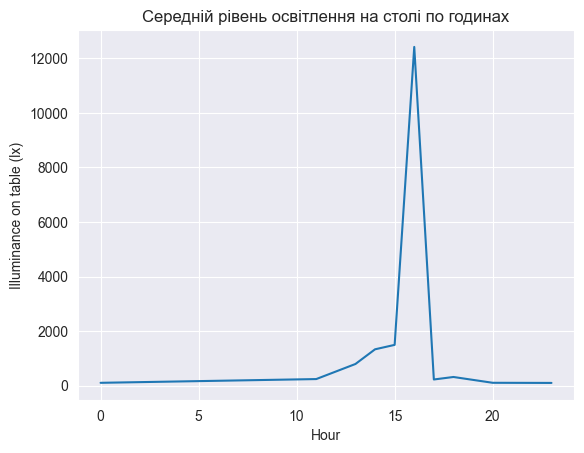

In [15]:
sns.lineplot(data=data, x="Hour", y="Illuminance on table (lx)", errorbar=None)
plt.title("Середній рівень освітлення на столі по годинах")
plt.show()

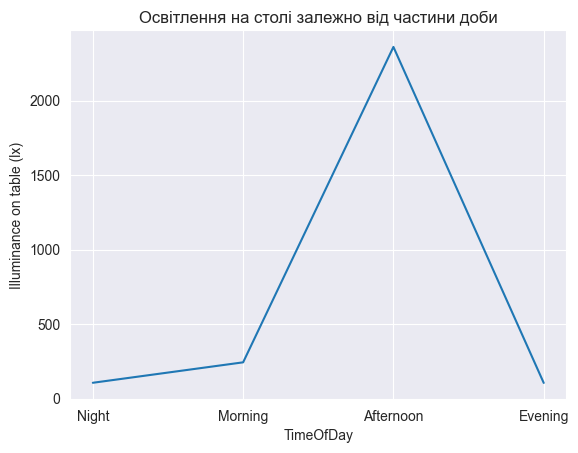

In [16]:
sns.lineplot(data=data, x="TimeOfDay", y="Illuminance on table (lx)", errorbar=None)
plt.title("Освітлення на столі залежно від частини доби")
plt.show()

# Аналіз освітлення на вікні

## Boxplot по Weather

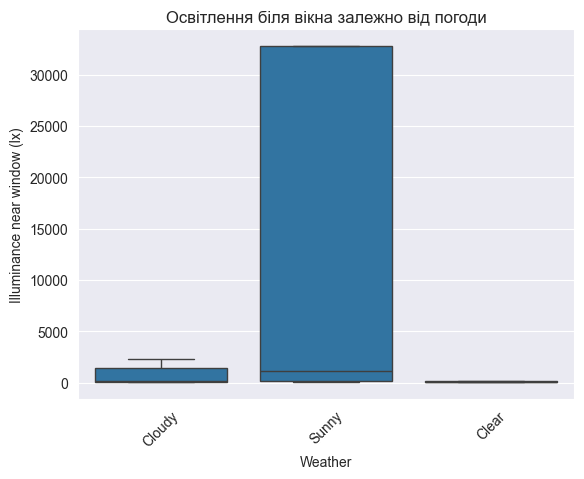

In [17]:
sns.boxplot(data=data, x="Weather", y="Illuminance near window (lx)")
plt.title("Освітлення біля вікна залежно від погоди")
plt.xticks(rotation=45)
plt.show()

## Boxplot для Window і Lights

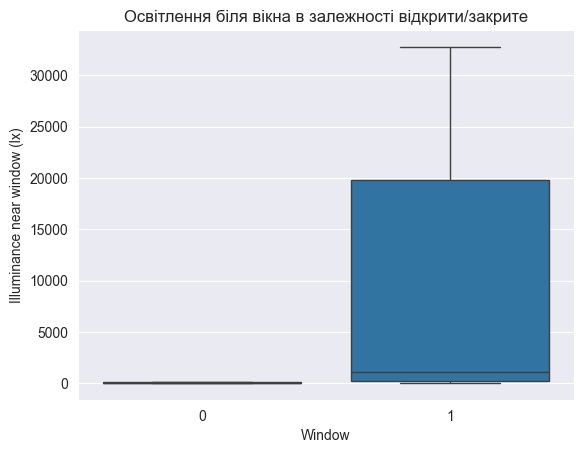

In [18]:
sns.boxplot(data=data, x="Window", y="Illuminance near window (lx)")
plt.title("Освітлення біля вікна в залежності відкрити/закрите")
plt.show()

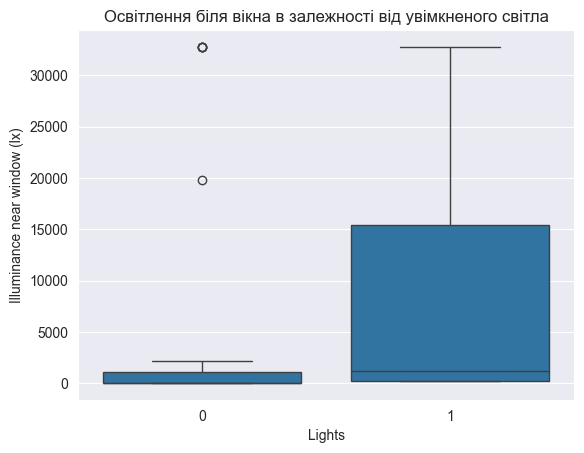

In [19]:
sns.boxplot(data=data, x="Lights", y="Illuminance near window (lx)")
plt.title("Освітлення біля вікна в залежності від увімкненого світла")
plt.show()

## Часові ряди

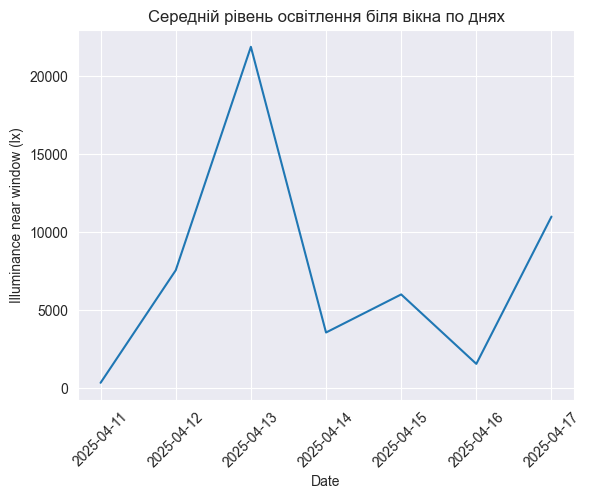

In [20]:
sns.lineplot(data=data, x="Date", y="Illuminance near window (lx)", errorbar=None)
plt.title("Середній рівень освітлення біля вікна по днях")
plt.xticks(rotation=45)
plt.show()

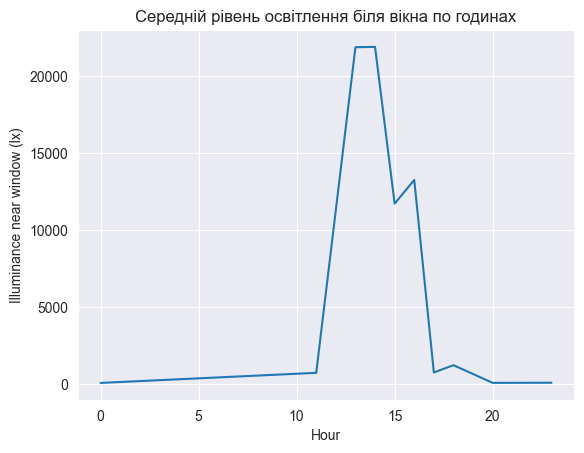

In [21]:
sns.lineplot(data=data, x="Hour", y="Illuminance near window (lx)", errorbar=None)
plt.title("Середній рівень освітлення біля вікна по годинах")
plt.show()

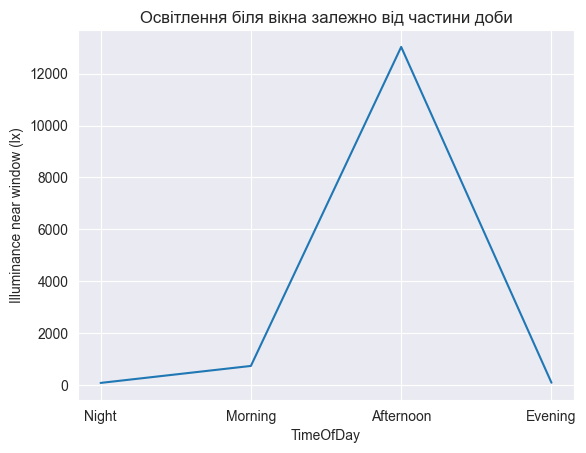

In [22]:
sns.lineplot(data=data, x="TimeOfDay", y="Illuminance near window (lx)", errorbar=None)
plt.title("Освітлення біля вікна залежно від частини доби")
plt.show()

# Висновок

В результаті аналізу було виявлено такі кореляції:
- Рівень освітленості як біля вікна, так і на робочому столі залежить від стану вікна (відкрите/закрите) та наявності штучного освітлення (увімкнене/вимкнене). При цьому вплив стану вікна є більш вираженим порівняно з впливом штучного освітлення.
- Встановлено залежність між погодними умовами та рівнем освітленості.
- Виявлено кореляцію між частиною доби та рівнем освітленості.
- Зафіксовано тісний зв’язок між рівнями освітленості біля вікна та на робочому столі між самими собою.